In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

**import datasets**

In [33]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head(80)
#df.info()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
75,male,group B,associate's degree,free/reduced,none,44,41,38
76,male,group E,some high school,standard,none,30,26,22
77,male,group A,bachelor's degree,standard,completed,80,78,81
78,female,group D,some high school,standard,completed,61,74,72


**Data Processing**

In [34]:
df['mean'] = (df["math score"]+df["reading score"]+df["writing score"])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [35]:
df.drop(["math score", "reading score", "writing score"], axis = 1, inplace = True)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [36]:
df = pd.get_dummies(df, drop_first=True)
df

,mean,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72.666667,0,1,0,0,0,1,0,0,0,0,1,1
1,82.333333,0,0,1,0,0,0,0,0,1,0,1,0
2,92.666667,0,1,0,0,0,0,0,1,0,0,1,1
3,49.333333,1,0,0,0,0,0,0,0,0,0,0,1
4,76.333333,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,94.000000,0,0,0,0,1,0,0,1,0,0,1,0
996,57.333333,1,0,1,0,0,0,1,0,0,0,0,1
997,65.000000,0,0,1,0,0,0,1,0,0,0,0,0
998,74.333333,0,0,0,1,0,0,0,0,1,0,1,0


In [61]:
df_x = df.drop(["mean"], axis=1)

**outliers analize**

In [62]:
from scipy.stats import zscore
df["Zscore_mean"] = zscore(df["mean"])
df[(df.Zscore_mean>2.0) | (df.Zscore_mean<-2.0)]

,mean,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,Zscore_mean
17,26.000000,0,1,0,0,0,0,0,0,0,1,0,1,-2.931235
55,39.000000,0,0,1,0,0,0,1,0,0,0,0,1,-2.018966
59,9.000000,0,0,1,0,0,0,0,0,0,1,0,1,-4.124201
61,37.333333,1,0,0,0,0,0,0,0,0,1,0,1,-2.135924
76,26.000000,1,0,0,0,1,0,0,0,0,1,1,1,-2.931235
84,38.333333,1,0,0,1,0,0,1,0,0,0,0,1,-2.065749
91,32.333333,1,0,1,0,0,0,1,0,0,0,0,1,-2.486796
114,99.666667,0,0,0,0,1,1,0,0,0,0,1,0,2.238285
145,31.333333,0,0,1,0,0,0,0,0,1,0,0,1,-2.556971
149,97.666667,1,0,0,0,1,0,0,0,0,0,0,0,2.097936


{'whiskers': [<matplotlib.lines.Line2D at 0x144231f0>,
 'caps': [<matplotlib.lines.Line2D at 0x14423550>,
 'boxes': [<matplotlib.lines.Line2D at 0x14423040>],
 'medians': [<matplotlib.lines.Line2D at 0x144238b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14423a60>],
 'means': []}

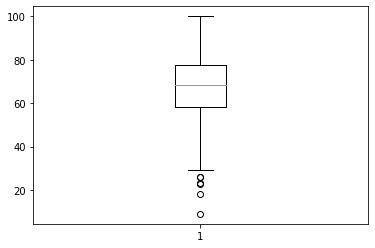

In [63]:
import matplotlib.pyplot as plt
plt.boxplot(df["mean"])

<AxesSubplot:>

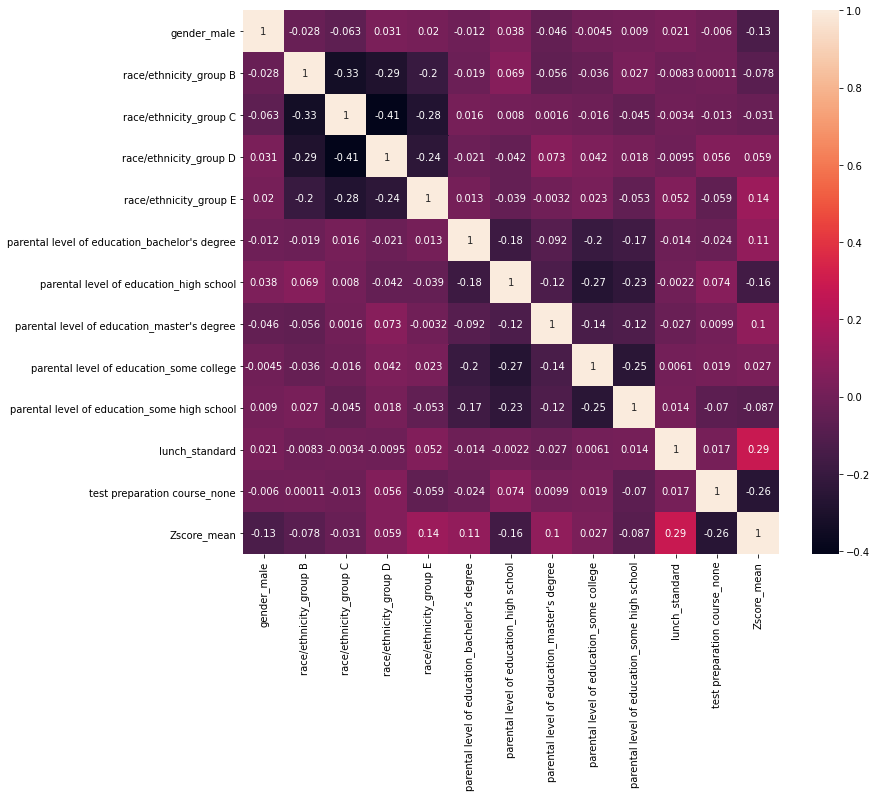

In [64]:
plt.figure(figsize=(12,10))
sn.heatmap(df_x.corr(), annot = True)

**Train and Test**

In [75]:
import statsmodels.api as sm
X = sm.add_constant(df_x)
y = df.iloc[:,0]

In [76]:
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.2, random_state=100)

**model creation**

In [80]:
model_1 = sm.OLS(train_y,train_x).fit()
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                      Results: Ordinary least squares
===========================================================================================================
Model:                           OLS                           Adj. R-squared:                  1.000      
Dependent Variable:              mean                          AIC:                             -11298.5247
Date:                            2021-08-08 09:07              BIC:                             -11252.3483
No. Observations:                200                           Log-Likelihood:                  5663.3     
Df Model:                        13                            F-statistic:                     1.729e+29  
Df Residuals:                    186                           Prob (F-statistic):              0.00       
R-squared:                       1.000                         Scale:                           1.5988e-26 
-----------------------------------------------------------------------------------------------------------
                                               Coef.  Std.Err.           t           P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------------------------------------
const                                         67.7707   0.0000 1270783833393038.0000 0.0000 67.7707 67.7707
gender_male                                   -0.0000   0.0000               -1.8218 0.0701 -0.0000  0.0000
race/ethnicity_group B                         0.0000   0.0000                0.4952 0.6210 -0.0000  0.0000
race/ethnicity_group C                         0.0000   0.0000                0.8266 0.4095 -0.0000  0.0000
race/ethnicity_group D                         0.0000   0.0000                0.2572 0.7973 -0.0000  0.0000
race/ethnicity_group E                        -0.0000   0.0000               -0.7146 0.4757 -0.0000  0.0000
parental level of education_bachelor's degree -0.0000   0.0000               -1.2174 0.2250 -0.0000  0.0000
parental level of education_high school       -0.0000   0.0000               -1.5370 0.1260 -0.0000  0.0000
parental level of education_master's degree   -0.0000   0.0000               -1.2769 0.2032 -0.0000  0.0000
parental level of education_some college      -0.0000   0.0000               -1.1456 0.2534 -0.0000  0.0000
parental level of education_some high school  -0.0000   0.0000               -1.4040 0.1620 -0.0000  0.0000
lunch_standard                                -0.0000   0.0000               -0.7348 0.4634 -0.0000  0.0000
test preparation course_none                  -0.0000   0.0000               -0.4576 0.6478 -0.0000  0.0000
Zscore_mean                                   14.2502   0.0000 1281792726281074.5000 0.0000 14.2502 14.2502
-----------------------------------------------------------------------------------------------------------
Omnibus:                            7.532                      Durbin-Watson:                         0.204
Prob(Omnibus):                      0.023                      Jarque-Bera (JB):                      7.504
Skew:                               0.472                      Prob(JB):                              0.023
Kurtosis:                           3.098                      Condition No.:                         18   
===========================================================================================================

"""

**prediction**

In [110]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(train_x, train_y)

LinearRegression()

In [86]:
pred_y = ml.predict(test_x)

In [94]:
ml.predict([[1,0,1,0,0,0,0,0,1,0,0,0,0,1]])

array([82.02086221])

In [95]:
from sklearn.metrics import r2_score

In [111]:
r2_score(test_y, pred_y)

1.0